## Chapter 3: Time Value of Money

TVM is a very important concept in finance, and should be straightforwards enough - present value, future value of both cash and annuities amongst other things. Numpy finance has a number of built in modules you can use as shown below.

In [4]:
import numpy as np 
import numpy_financial as npf

# calculate the future value of 100 dollars at a rate of 10% for 2 cycles
npf.fv(0.1,2,0,-100)


121.00000000000001

I have written a number of important formulae on a separate google docs. The rest of this will be dedicated to writing basic programs.

In [6]:
"""Here is one example. John plans to donate $3,000 per year to his alma mater to have
a welcoming party for the forthcoming MBA students at the end of the year forever.
If the annual discount rate is 2.5% and the first party will occur at the end of the first
year, how much he should donate today? By applying the preceding formula, the
answer is $120,000:"""

3000/0.025

120000.0

Assume that the discount rate is 1% per year. The annual cash flow is $20 for the next
10 years. The first cash flow will be paid today. What is the present value of those
cash flows? The result is shown here:

In [29]:
npf.pv(0.01,10,20,0,1)

-44836.5011530056

In [13]:
# We can import a financial calculator package
import finance_calculator as fc

The code for an example financial calculator has been provided below. Use it for calculations.

In [23]:
def pvFunction(fv,r,n):
    return fv/(1+r)**n
def pvPerpetuity(c,r):
    return c/r
def pvPerpetuityDue(c,r):
    return c/r*(1+r)
def pvAnnuity(c,r,n):
    return c/r*(1-1/(1+r)**n)
def pvAnnuityDue(c,r,n):
    return c/r*(1-1/(1+r)**n)*(1+r)
def pvGrowingAnnuity(c,r,n,g):
    return c/r*(1-(1+g)**n/(1+r)**n)
def fvFunction(pv,r,n):
    return pv/r*(1-1/(1+r)**n)
def fvAnnuity(cv,r,n):
    return cv/r*((1+r)**n-1)
def fvAnnuityDue(cv,r,n):
    return cv/r*((1+r)**n-1)*(1+r)

We can also display TVM using matplotlib charts. This is shown below:

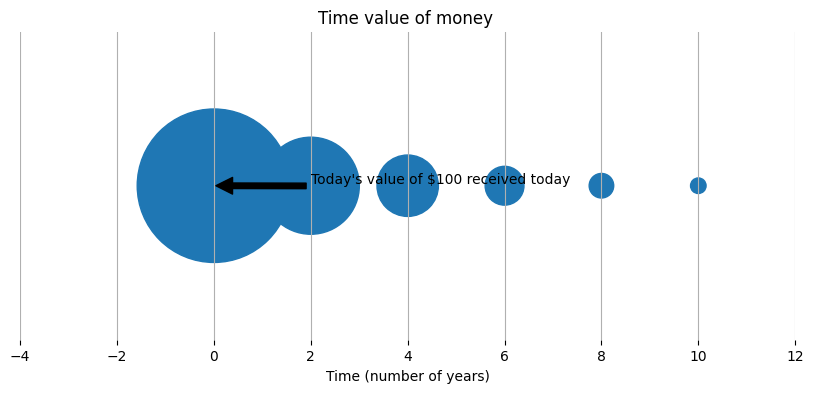

In [51]:
from matplotlib.pyplot import *
fig1 = figure(facecolor='white', figsize= (10,4))
ax1 = axes(frameon=False)
ax1.set_frame_on(False)
ax1.get_xaxis().tick_bottom()
ax1.axes.get_yaxis().set_visible(False)
x=range(0,11,2)
x1=range(len(x),0,-1)
y = [0]*len(x);

fig1.name= "Today's value of $100 received today"
annotate(fig1.name,xy=(0,0),xytext=(2,0.001),arrowprops=dict(facecolor='black',shrink=0.02))
s = [50*2.5**n for n in x1];
ax1.set_title("Time value of money ")
ax1.set_xlabel("Time (number of years)")
ax1.set_ylabel("Y")
ax1.scatter(x,y,s=s)
ax1.set_xlim([-4,12])
ax1.grid()
show()

The relationship between NPV and discount rate.

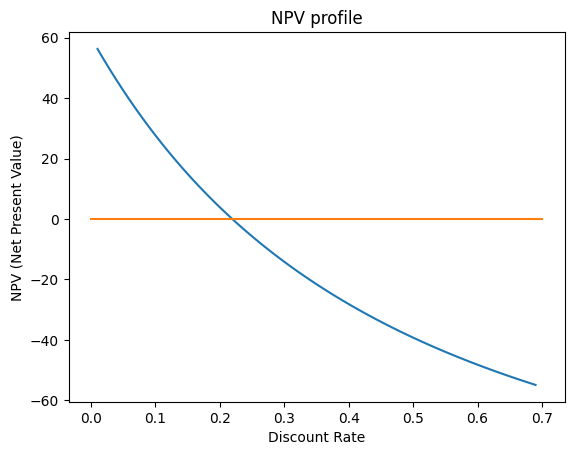

In [54]:

from matplotlib.pyplot import *
cashflows=[-120,50,60,70]
rate=[]
npv=[]
x=(0,0.7)
y=(0,0)
for i in range(1,70):
    rate.append(0.01*i)
    npv.append(npf.npv(0.01*i,cashflows))

title("NPV profile")
xlabel("Discount Rate")
ylabel("NPV (Net Present Value)")
plot(rate,npv)
plot(x,y)
show()

## Review Questions 

1. What is the PV of $206 received for 10 years with an annual discount rate of 2.5%?

In [21]:
print(pvAnnuityDue(206,0.025,10))

# OR

print(npf.pv(0.025,10,206,0,1))

1847.998299024507
-1847.9982990245064


2. What is the future value of perpetuity with a periodic annual payment of $1
and a 2.4% annual discount rate?

In [24]:
fvAnnuity(1,0.024,1)

1.0000000000000009

3. For a normal project, its NPV is negatively correlated with the discount rate.
Why?

high discount rate --> much higher future value, present value is diminished. It's a simple question of interest.

4. John deposits $5,000 in the bank for 25 years. If the annual rate is 0.25% per
year, what is the future value?

In [25]:
npf.fv(0.025,25,0,5000)

-9269.720491610758

5. If the annual payment is $55 with 20 years remaining, what is the present
value if the annual discount rate is 5.41%, compounded semi-annually?

In [27]:
pvAnnuity(55/2,0.0541/2,20*2)

667.0917824952655

5. If Mary plans to have $2,400 by the end of year 5, how much does she have to
save each year if the corresponding annual rate is 3.12%?

In [31]:
# use the pmt function from finance numpy to calculate this

npf.pmt(0.0312,5,2400)

-525.8478442817194

8. If a firm's earnings per share grows from $2 to $4 over a 9-year period (the
total growth is 100%), what is its annual growth rate?

In [75]:
# use the rate function from the numpy financial package

r = 2 ** (1/9)
r


1.080059738892306

10. A project contributes cash inflows of $5,000 and $8,000 at the end of the first
and second years. The initial cost is $3,000. The appropriate discount rates
are 10% and 12% for the first and the second years respectively. What is the
NPV of the project?

In [84]:
3000 + pvFunction(5000,0.1,1) + pvFunction(8000,0.12,2)

13923.005565862706

11. Firm A will issue new bonds with annual coupon payment of $80 and a face
value of $1,000. Interest payments are made semi-annually, and the bond
matures in 2 years. The spot interest rate for the first year is 10%. At the end
of the first year, the 1-year spot rate is expected to be 12%:

° What is the present value of the bond?

° What is the lump sum you are willing to accept at the end of the
second year?

In [88]:
value = 1000/(1.06*1.06*1.05*1.05)
payments = 40/(1.06**2 * 1.05**2) + 40/(1.06 * 1.05**2) + 40/(1.05**2) + 40/(1.05)
print(payments)
value + payments

140.89406499516858


948.1470718108056

12. Peter's rich uncle has promised him a payment of $4,000 if he completes
college in four years. Richard has just finished a very difficult sophomore
(second) year, including taking several finance courses. Richard would very
much like to take a long vacation. The appropriate discount rate is 10%
compounded semi-annually. What is value that Peter would be giving up
today if he took his vacation?

In [89]:
pvFunction(4000,0.05,2*4)

2707.357448114748